In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import ipywidgets as widgets
sb.set()

In [2]:
calendar = pd.read_csv("calendar.csv")
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
listings = pd.read_csv("listings.csv")
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
reviews = pd.read_csv("reviews.csv")
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [5]:
reviews.info()
print()
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
listings = pd.read_csv("https://raw.githubusercontent.com/brandonywl/cz1015-miniproject/master/listings.csv")
variables = [var for var in listings]


variables_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',\
                     'host_url', 'host_name', 'host_id', 'host_since', 'host_location', 'host_about', 'host_response_time', 'name',\
                     'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit']

variables_to_drop += ["host_acceptance_rate", "host_is_superhost", "country", "country_code", "smart_location", "state", "city", \
                      "host_thumbnail_url", "host_picture_url", "host_verifications", "host_has_profile_pic", "host_identity_verified",\
                      "neighbourhood_cleansed", "neighbourhood", "market", 'host_neighbourhood', 'host_response_rate', 'host_listings_count', \
                      'host_total_listings_count', 'street']

variables_to_drop += ["is_location_exact", "bed_type", "guests_included", "extra_people", "minimum_nights", "maximum_nights", \
                      "calendar_updated", 'has_availability']

variables_to_drop += ["calendar_last_scraped", "first_review", "last_review","jurisdiction_names", "requires_license", "license", \
                      "availability_60", "availability_90"]

for var in variables_to_drop:
    try:
      variables.remove(var)
    except:
      pass

listings = pd.DataFrame(listings[variables])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 34 columns):
id                                  3818 non-null int64
neighbourhood_group_cleansed        3818 non-null object
zipcode                             3811 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3817 non-null object
room_type                           3818 non-null object
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
beds                                3817 non-null float64
amenities                           3818 non-null object
square_feet                         97 non-null float64
price                               3818 non-null object
weekly_price                        2009 non-null object
monthly_price                       

In [7]:
cleaned_data = listings.copy()

# Convert the price, weekly price and monthly price from string to float 
prices = ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee"]
for price in prices:
  cleaned_data[price] = cleaned_data[price].str.replace("$","")
  cleaned_data[price] = cleaned_data[price].str.replace(",","")
  cleaned_data[price] = cleaned_data[price].astype("float64")

# Assuming no entry means no reviews
cleaned_data["reviews_per_month"].fillna(value = 0, inplace = True)

# Isolate all the review_scores and fill in empty reviews with the median, assuming that no review means people deem it to be normal
review_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', \
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_communication', \
                 'review_scores_location', 'review_scores_value']

for review in review_scores:
  cleaned_data[review].fillna(value = cleaned_data[review].median(), inplace = True)

# Assume that empty entries == no special price. Hence weekly price = price * 7 and monthly price = price * 31
empty_prices = ["weekly_price", "monthly_price"]
days = [7,31]
count = 0
for price in empty_prices:
  cleaned_data[price].fillna(value = cleaned_data['price'] * days[count], inplace = True)
  count += 1

# Assume that empty entries == No security deposit and no cleaning fees
empty_prices = ['security_deposit', 'cleaning_fee']
for price in empty_prices:
  cleaned_data[price].fillna(value = 0, inplace = True)

# As some accomodations have 4.5 toilets, we are going to assume that an empty entry == there are no toilets in the apartment. Same goes for
# beds and bedrooms
# This can be the scenario where they only rent the apartment, hence no access to the toilet
# Or they rent a boat and does not count as a bedroom / bed
rooms = ['bathrooms', 'bedrooms', 'beds']
for room in rooms:
  cleaned_data[room].fillna(value = 0, inplace = True)


# We will be classifying the only entry with no property_type under 'Other'
cleaned_data['property_type'].fillna(value = 'Other', inplace = True)


# Isolate all the categorical data as they are the only ones with type object
categorical_data = ['instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
                    'require_guest_phone_verification', 'neighbourhood_group_cleansed', \
                    'property_type', 'room_type']
for data in categorical_data:
  # Convert data type to category
  cleaned_data[data] = cleaned_data[data].astype('category')


cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 34 columns):
id                                  3818 non-null int64
neighbourhood_group_cleansed        3818 non-null category
zipcode                             3811 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3818 non-null category
room_type                           3818 non-null category
accommodates                        3818 non-null int64
bathrooms                           3818 non-null float64
bedrooms                            3818 non-null float64
beds                                3818 non-null float64
amenities                           3818 non-null object
square_feet                         97 non-null float64
price                               3818 non-null float64
weekly_price                        3818 non-null float64
monthly_price               

In [8]:
# Change datatype into str
cleaned_data["amenities"] = cleaned_data["amenities"].astype("str")
# Clean the string up into a list of amenities they have
cleaned_data['amenities'] = cleaned_data["amenities"].str.replace("{", "")
cleaned_data['amenities'] = cleaned_data["amenities"].str.replace("}", "")
cleaned_data['amenities'] = cleaned_data["amenities"].str.replace("\"", "")

cleaned_data['amenities'] = cleaned_data['amenities'].str.split(",")

cleaned_data['amenities']

0       [TV, Cable TV, Internet, Wireless Internet, Ai...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Cable TV, Internet, Wireless Internet, Ai...
3       [Internet, Wireless Internet, Kitchen, Indoor ...
4       [TV, Cable TV, Internet, Wireless Internet, Ki...
                              ...                        
3813    [TV, Cable TV, Internet, Wireless Internet, Ai...
3814    [TV, Cable TV, Internet, Wireless Internet, Ki...
3815    [Cable TV, Wireless Internet, Kitchen, Free Pa...
3816    [TV, Wireless Internet, Kitchen, Free Parking ...
3817    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, Length: 3818, dtype: object

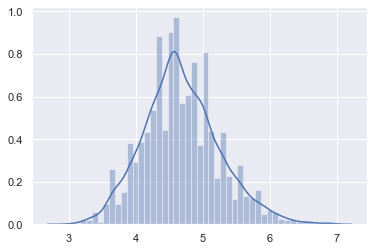

In [9]:
temp = pd.DataFrame(np.log(cleaned_data['price']))
sb.distplot(temp)

In [10]:
cleaned_data['log_price'] = np.log(cleaned_data['price'])

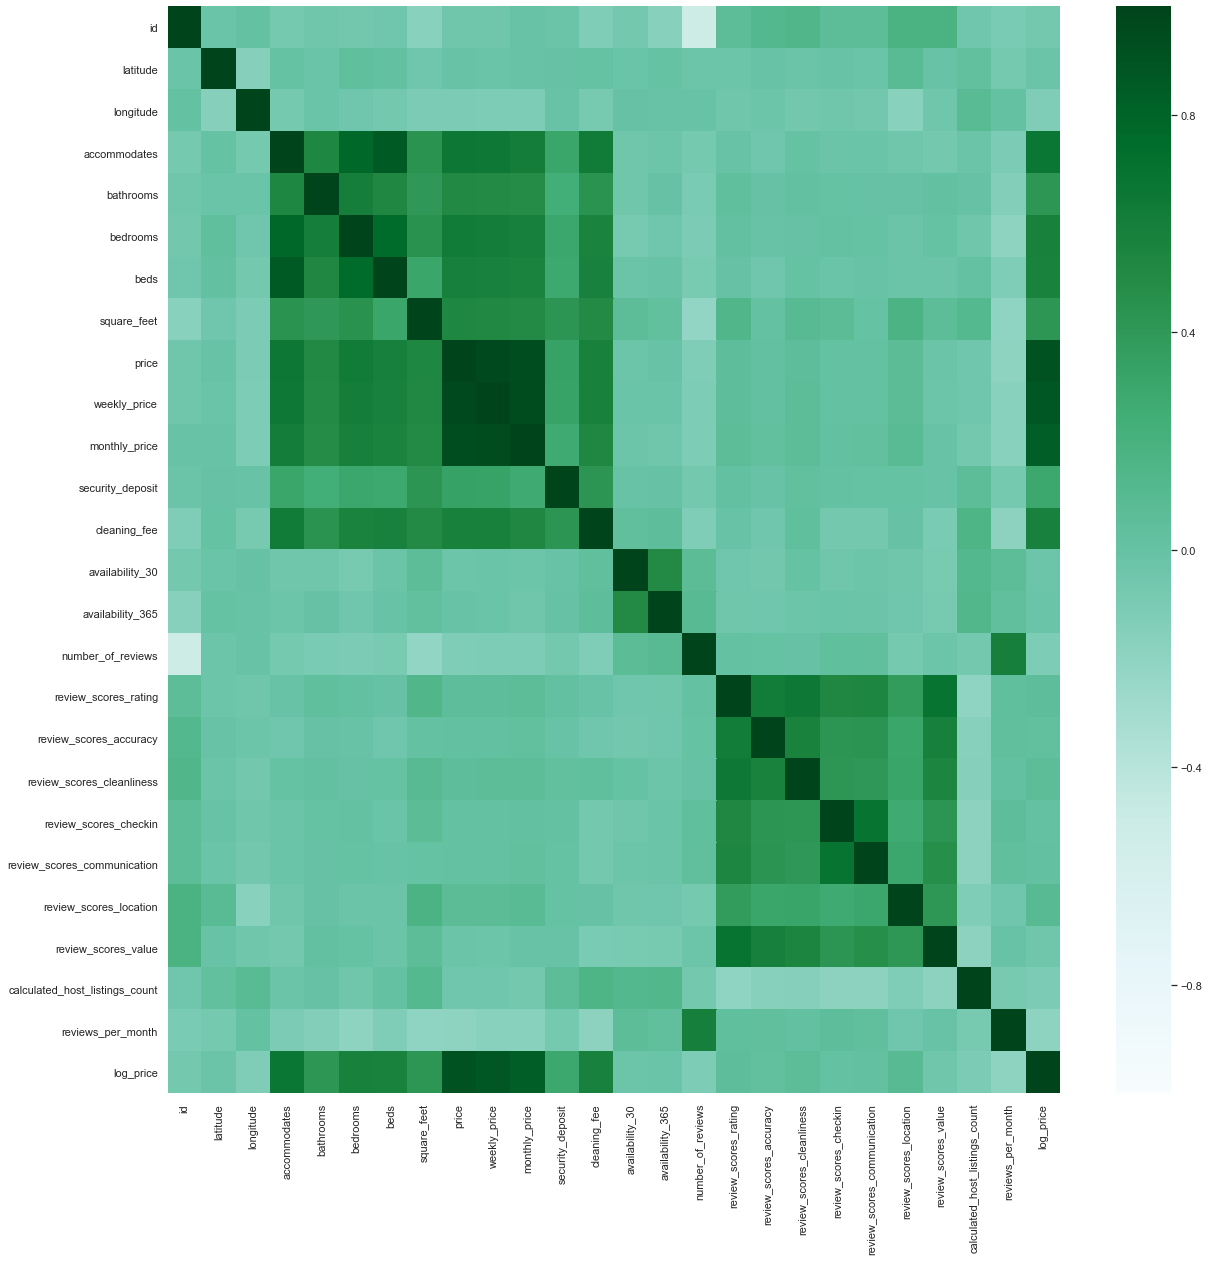

In [11]:
f, axes = plt.subplots(1,1, figsize = (20,20))
sb.heatmap(cleaned_data.corr(), vmin = -1, vmax = 1, cmap = 'BuGn')

In [12]:
regression_variables = ['log_price', 'neighbourhood_group_cleansed', 'property_type', 'room_type','security_deposit', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
regression_data = cleaned_data[regression_variables]

regression_data

,log_price,neighbourhood_group_cleansed,property_type,room_type,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds
0,4.442651,Queen Anne,Apartment,Entire home/apt,0.0,0.0,4,1.0,1.0,1.0
1,5.010635,Queen Anne,Apartment,Entire home/apt,100.0,40.0,4,1.0,1.0,1.0
2,6.882437,Queen Anne,House,Entire home/apt,1000.0,300.0,11,4.5,5.0,7.0
3,4.605170,Queen Anne,Apartment,Entire home/apt,0.0,0.0,3,1.0,0.0,2.0
4,6.109248,Queen Anne,House,Entire home/apt,700.0,125.0,6,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
3813,5.883322,Other neighborhoods,House,Entire home/apt,0.0,230.0,6,2.0,3.0,3.0
3814,4.369448,Capitol Hill,Apartment,Entire home/apt,500.0,50.0,4,1.0,1.0,2.0
3815,4.532599,Rainier Valley,House,Entire home/apt,250.0,35.0,2,1.0,1.0,1.0
3816,4.595120,Capitol Hill,Condominium,Entire home/apt,300.0,45.0,2,1.0,0.0,1.0


In [13]:
try:
    # One-hot encode the neighbourhoods && property type
    regression_data = pd.concat([regression_data, pd.get_dummies(regression_data['neighbourhood_group_cleansed'], prefix = 'neighbourhood', drop_first = True)], axis = 1, sort = False)
    regression_data = pd.concat([regression_data, pd.get_dummies(regression_data['property_type'], prefix = 'property_type', drop_first = True)], axis = 1, sort = False)
    regression_data.drop(['neighbourhood_group_cleansed'], axis = 1, inplace = True)
    regression_data.drop(['property_type'], axis = 1, inplace = True)
except:
    pass

In [14]:
regression_data

,log_price,room_type,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,neighbourhood_Beacon Hill,neighbourhood_Capitol Hill,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,4.442651,Entire home/apt,0.0,0.0,4,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.010635,Entire home/apt,100.0,40.0,4,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.882437,Entire home/apt,1000.0,300.0,11,4.5,5.0,7.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4.605170,Entire home/apt,0.0,0.0,3,1.0,0.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.109248,Entire home/apt,700.0,125.0,6,2.0,3.0,3.0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,5.883322,Entire home/apt,0.0,230.0,6,2.0,3.0,3.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3814,4.369448,Entire home/apt,500.0,50.0,4,1.0,1.0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3815,4.532599,Entire home/apt,250.0,35.0,2,1.0,1.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3816,4.595120,Entire home/apt,300.0,45.0,2,1.0,0.0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
# Split the price from the data
x, y = regression_data.iloc[:,2:],regression_data.iloc[:, 0]

In [17]:
# Train-test split with 20% split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.5, \
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [19]:
xg_reg.fit(x_train, y_train)


y_train_pred = xg_reg.predict(x_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = 1 - mse_train / np.var(y_test)
print("MSE (train): {:.3f}".format(mse_train))
print("R^2 (train): {:.3f}".format(r2_train))

y_test_pred = xg_reg.predict(x_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = 1 - mse_test / np.var(y_test)
print("MSE (test): {:.3f}".format(mse_test))
print("R^2 (test): {:.3f}".format(r2_test))

MSE (train): 0.104
R^2 (train): 0.672
MSE (test): 0.112
R^2 (test): 0.646


C:\Users\Brandon\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [20]:
regression_data

,log_price,room_type,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,neighbourhood_Beacon Hill,neighbourhood_Capitol Hill,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,4.442651,Entire home/apt,0.0,0.0,4,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.010635,Entire home/apt,100.0,40.0,4,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.882437,Entire home/apt,1000.0,300.0,11,4.5,5.0,7.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4.605170,Entire home/apt,0.0,0.0,3,1.0,0.0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.109248,Entire home/apt,700.0,125.0,6,2.0,3.0,3.0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,5.883322,Entire home/apt,0.0,230.0,6,2.0,3.0,3.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3814,4.369448,Entire home/apt,500.0,50.0,4,1.0,1.0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3815,4.532599,Entire home/apt,250.0,35.0,2,1.0,1.0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3816,4.595120,Entire home/apt,300.0,45.0,2,1.0,0.0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

x, y = regression_data.iloc[:,2:],regression_data.iloc[:, 0]

dist = pd.DataFrame({"r2_train":[], "r2_test":[]})
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.4, \
                          max_depth = 3, alpha = 5, n_estimators = 7)

## Init = 0.3, 0.5, 2, 5, 5

trainList = []
testList = []


for idx in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    xg_reg.fit(x_train, y_train)
    
    y_train_pred = xg_reg.predict(x_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = 1 - mse_train / np.var(y_test)

    y_test_pred = xg_reg.predict(x_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = 1 - mse_test / np.var(y_test)
    
    trainList.append(r2_train)
    testList.append(r2_test)
    
dist['r2_train'] = trainList
dist['r2_test'] = testList

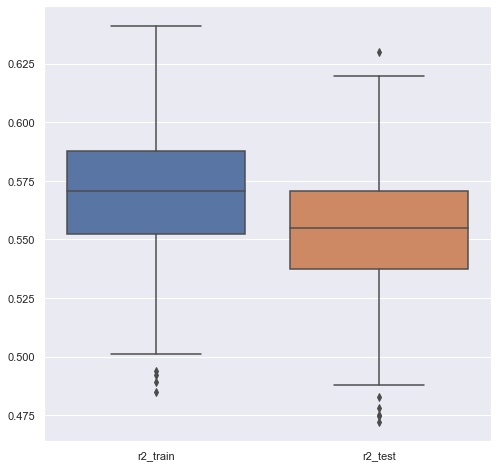

In [22]:
f, axes = plt.subplots(1,1, figsize = (8,8))
sb.boxplot(data = dist, orient = 'v')

In [23]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 35 columns):
id                                  3818 non-null int64
neighbourhood_group_cleansed        3818 non-null category
zipcode                             3811 non-null object
latitude                            3818 non-null float64
longitude                           3818 non-null float64
property_type                       3818 non-null category
room_type                           3818 non-null category
accommodates                        3818 non-null int64
bathrooms                           3818 non-null float64
bedrooms                            3818 non-null float64
beds                                3818 non-null float64
amenities                           3818 non-null object
square_feet                         97 non-null float64
price                               3818 non-null float64
weekly_price                        3818 non-null float64
monthly_price               

In [24]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

clustering_variables = ['id', 'price', 'cleaning_fee', \
                        'accommodates', 'bathrooms', \
                        'bedrooms', 'beds']
clustering_data = pd.DataFrame(cleaned_data[clustering_variables])
#clustering_data['price'] = np.log(clustering_data['price'])
#clustering_data['cleaning_fee'] = np.log(clustering_data['cleaning_fee']+1)
clustering_data.head()

,id,price,cleaning_fee,accommodates,bathrooms,bedrooms,beds
0,241032,85.0,0.0,4,1.0,1.0,1.0
1,953595,150.0,40.0,4,1.0,1.0,1.0
2,3308979,975.0,300.0,11,4.5,5.0,7.0
3,7421966,100.0,0.0,3,1.0,0.0,2.0
4,278830,450.0,125.0,6,2.0,3.0,3.0


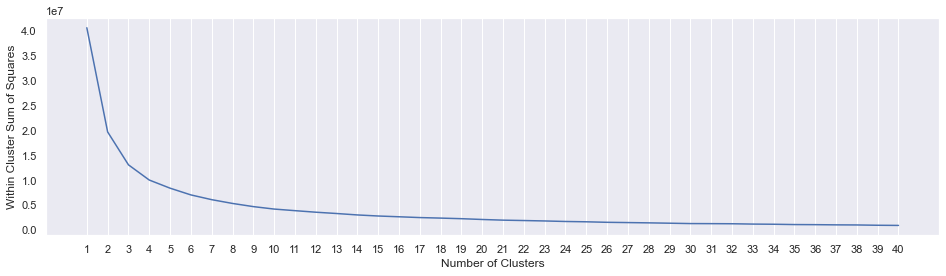

In [25]:
'''
Code obtained from M5 Clustering from Prof Sourav
'''

temp_clustering = clustering_data.iloc[:, 1:]
ids = pd.DataFrame(clustering_data.iloc[:, 0])

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(temp_clustering)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [26]:
# Set "optimal" Clustering Parameters
num_clust = 6
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(temp_clustering)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Features 	Price 	Fees 	Accom. 	WCs 	Rooms 	Beds

Cluster 0:	73.6	14.27	2.28	1.1	0.93	1.22	
Cluster 1:	116.82	70.46	3.64	1.15	1.22	1.81	
Cluster 2:	225.67	120.65	5.66	1.77	2.37	3.02	
Cluster 3:	397.45	135.72	7.55	2.48	3.3	4.02	
Cluster 4:	761.11	159.06	8.0	2.78	3.33	4.17	
Cluster 5:	169.76	23.02	3.54	1.21	1.35	1.74	

Within Cluster Sum of Squares : 7021459.619991019



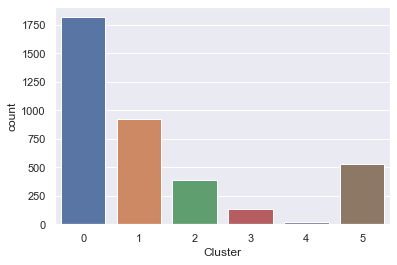

In [27]:
# Print the Cluster Centers
print("Features", "\tPrice", "\tFees", "\tAccom.", "\tWCs", "\tRooms", "\tBeds")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(temp_clustering)

# Append Labels to the Data
X_labeled = temp_clustering.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

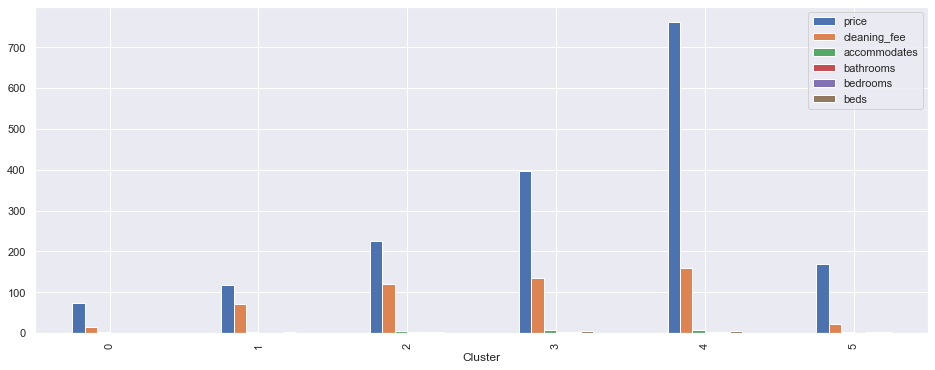

In [28]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

In [29]:
clustering_data = pd.concat([ids, X_labeled.reindex(index = ids.index)], axis = 1, sort = False)
clustering_data

,id,price,cleaning_fee,accommodates,bathrooms,bedrooms,beds,Cluster
0,241032,85.0,0.0,4,1.0,1.0,1.0,0
1,953595,150.0,40.0,4,1.0,1.0,1.0,5
2,3308979,975.0,300.0,11,4.5,5.0,7.0,4
3,7421966,100.0,0.0,3,1.0,0.0,2.0,0
4,278830,450.0,125.0,6,2.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...
3813,8101950,359.0,230.0,6,2.0,3.0,3.0,3
3814,8902327,79.0,50.0,4,1.0,1.0,2.0,0
3815,10267360,93.0,35.0,2,1.0,1.0,1.0,0
3816,9604740,99.0,45.0,2,1.0,0.0,1.0,1


In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brandon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brandon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brandon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Brandon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
reviews_data = pd.read_csv("reviews.csv", \
                      usecols = ["listing_id", "comments"])

reviews_data['comments'] = reviews_data['comments'].astype("str")
reviews_data['comments'].fillna('Null', inplace = True)

stop_words = stopwords.words('english')
new_stop = ['place', 'stay', 'house', 'highly', 'recommend', 'nice', 'everything', 'needed', '\'s', 'n\'t', 'great', \
            'seattle', 'us', 'host', 'would', 'time', 'apartment', 'easy', 'definitely', 'really', 'also', 'well', \
            'amazing', 'room', 'home', 'made', 'get', 'like', 'even', 'good', 'wonderful', 'could', 'amy', 'prez', 'seth']
new_stop += stop_words
new_stop += list(string.punctuation)

cluster_freq_dist = []

for i in range(num_clust):
    subset = pd.DataFrame(clustering_data[clustering_data['Cluster'] == i])
    subset_id = subset['id']
    reviews = reviews_data[reviews_data.listing_id.isin(subset_id)]
    temp_comments = " ".join(reviews['comments'])
    tokens = word_tokenize(temp_comments)
    clean_tokens = []
    clean_tokens = [w for w in tokens if w.lower() not in new_stop]
    freq = nltk.FreqDist(clean_tokens)
    cluster_freq_dist.append(freq)

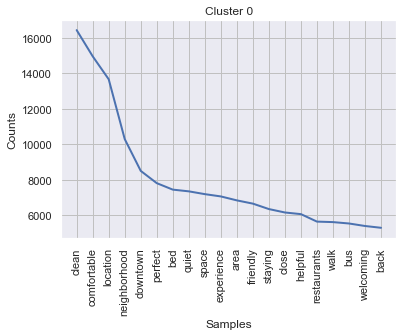

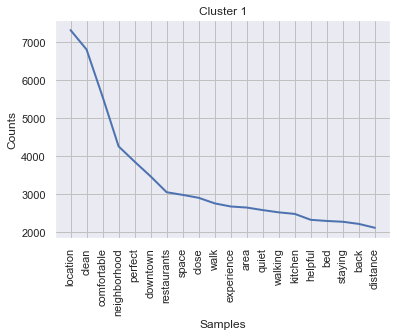

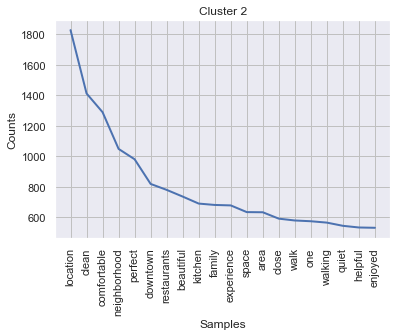

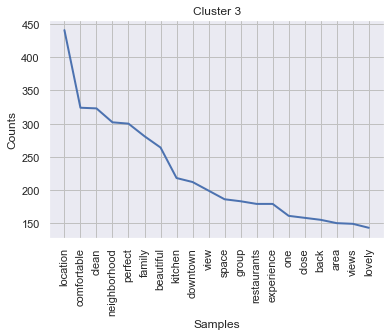

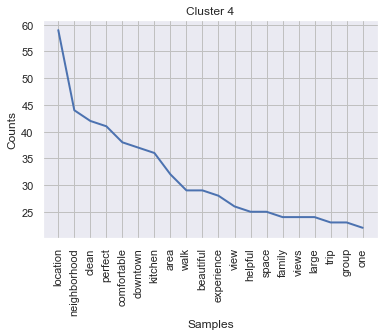

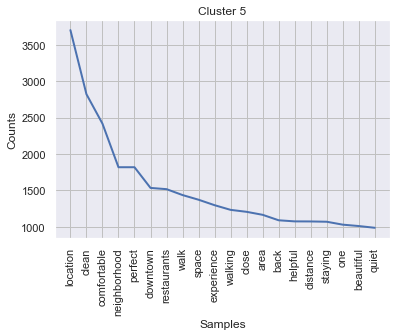

In [32]:
topwords = []
for i in range(6):
    cluster_freq_dist[i].plot(20, cumulative = False, title = "Cluster {}".format(i))
    top_words = [word[0] for word in cluster_freq_dist[i].most_common(20)]
    topwords.append(top_words)

In [33]:
temp = clustering_data[clustering_data['Cluster'] == 5]
#cleaned_data[cleaned_data.id.isin(subset_id)]
temp_ids = temp['id']
temp = cleaned_data[cleaned_data.id.isin(temp_ids)]
temp['neighbourhood_group_cleansed'].value_counts()
temp

,id,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,log_price
1,953595,Queen Anne,98119,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,f,strict,t,t,6,1.48,5.010635
9,2493658,Queen Anne,98119,47.637492,-122.366889,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,9.0,f,strict,t,t,6,1.55,5.010635
18,7735464,Queen Anne,98119,47.639776,-122.372235,Apartment,Private room,2,2.0,1.0,...,10.0,10.0,10.0,f,flexible,f,f,1,0.00,5.298317
26,9025039,Queen Anne,98119,47.638752,-122.367973,House,Entire home/apt,5,1.0,2.0,...,10.0,10.0,10.0,f,flexible,f,f,1,0.00,5.010635
30,2481869,Queen Anne,98119,47.639008,-122.365320,Apartment,Entire home/apt,4,1.0,1.0,...,10.0,10.0,10.0,f,strict,t,t,6,1.86,5.164786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,2755730,Other neighborhoods,98103,47.649271,-122.347817,Apartment,Entire home/apt,6,1.0,2.0,...,10.0,10.0,10.0,t,strict,f,f,1,3.77,5.164786
3795,5673552,Other neighborhoods,98103,47.650124,-122.343283,Loft,Entire home/apt,4,1.0,0.0,...,10.0,10.0,10.0,f,flexible,f,f,1,1.18,5.298317
3800,5482204,Other neighborhoods,98103,47.663613,-122.349519,Bed & Breakfast,Private room,2,1.5,1.0,...,10.0,10.0,10.0,f,strict,f,f,1,0.00,5.220356
3802,8562314,Other neighborhoods,98103,47.650765,-122.347787,House,Entire home/apt,4,1.0,2.0,...,10.0,10.0,10.0,f,flexible,f,f,1,0.00,5.298317


In [34]:
from IPython.display import display
import ipywidgets as widgets

In [35]:
warnings.filterwarnings('ignore')

regression_variables = ['log_price', 'neighbourhood_group_cleansed', 'property_type', \
                        'room_type','security_deposit', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds']
temp_data = cleaned_data[regression_variables]
temp_data = temp_data.append(pd.Series(), ignore_index = True)
data = temp_data.iloc[3818:]
temp_data = temp_data.iloc[:3818]
properties = [prop for prop in cleaned_data['property_type'].unique()]
rooms = ['Entire home/apt', 'Private Room', 'Shared Room']
neighbourhoods = [neighbourhood for neighbourhood in cleaned_data['neighbourhood_group_cleansed'].unique()]
properties.sort()
neighbourhoods.sort()
clustering_variables = ['price', 'cleaning_fee', \
                        'accommodates', 'bathrooms', \
                        'bedrooms', 'beds']


class Tester:
    def __init__(self):
        self.prop = None
        self.neighbourhood = None
        self.room = None
        self.sec_fees = None
        self.clean_fees = None
        self.accomodates = None
        self.bedrooms = None
        self.bathrooms = None
        self.beds = None
        self.price = None
        self.data = data
        
    def set_prop(self, Property):
        self.prop = Property
    def set_neighbourhood(self, Area):
        self.neighbourhood = Area
    def set_room(self, Room):
        self.room = Room
    def set_sec_fees(self, SecurityFees):
        self.sec_fees = SecurityFees
    def set_clean_fees(self, CleanFees):
        self.clean_fees = CleanFees
    def set_accoms(self, change):
        self.accomodates = change['new']
    def set_bedrooms(self, Bedrooms):
        self.bedrooms = Bedrooms
    def set_bathrooms(self, Bathrooms):
        self.bathrooms = Bathrooms
    def set_beds(self, Beds):
        self.beds = Beds
    def set_price(self, Price):
        self.price = Price
        
test = Tester()

def predictions(event):
    if not test.accomodates:
        output.clear_output()
        with output:
            print("Your listing must accommodate at least one person")
        return
    if test.accomodates < 0 or test.sec_fees < 0 or test.clean_fees < 0 or test.beds < 0 or test.bedrooms < 0 or test.bathrooms < 0:
        output.clear_output()
        with output:
            print("Your listing cannot have a negative input")
        return
    test.data = data
    test.data['room_type'] = test.room
    test.data['room_type'] = test.data['room_type'].astype("category")
    test.data['property_type'] = test.prop
    test.data['neighbourhood_group_cleansed'] = test.neighbourhood
    test.data['security_deposit'] = test.sec_fees
    test.data['cleaning_fee'] = test.clean_fees
    test.data['accommodates'] = test.accomodates
    test.data['bedrooms'] = test.bedrooms
    test.data['bathrooms'] = test.bathrooms
    test.data['beds'] = test.beds
    
    # One-hot encode the data
    encoded_data = temp_data.append(test.data, ignore_index = True)
    try:
        # One-hot encode the neighbourhoods && property type
        encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['neighbourhood_group_cleansed'], \
                                                               prefix = 'neighbourhood', \
                                                               drop_first = True)], axis = 1, sort = False)
        encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['property_type'], prefix = 'property_type', \
                                                               drop_first = True)], axis = 1, sort = False)
        encoded_data.drop(['neighbourhood_group_cleansed'], axis = 1, inplace = True)
        encoded_data.drop(['property_type'], axis = 1, inplace = True)
    except:
        print("Failed encoding!")
        return
    test.data = encoded_data.iloc[3818:]
    test.regdata = test.data.copy()
    test.regdata = test.regdata.drop(columns = ['log_price', 'room_type'])
    # Do regression to check price if they don't want to predict, but want to just list
    if (not test.price):
        test.data['log_price'] = xg_reg.predict(test.regdata)
        prices.value = round(np.exp(test.data['log_price']), 2)
        test.data['price'] = test.price
    else:
        test.data['price'] = test.price
        test.data['log_price'] = np.log(test.price)
    
    
    test.clustdata = pd.DataFrame(test.data[clustering_variables])
    # Do clustering to give the top 20 words
    label = kmeans.predict(test.clustdata)
    label = label[0]
    output.clear_output()
    with output:
        cluster_freq_dist[label].plot(20, cumulative = False, title = "Cluster {}".format(label))
    
def on_value_change(change):
    test.price = change['new']
    
def clearing(event):
    accoms_box.children[-1].value = 0
    bedrooms_box.children[0].value = 0
    bathrooms_box.children[0].value = 0
    beds_box.children[0].value = 0
    sec_fees.children[0].value = 0
    clean_fees.children[0].value = 0
    prices.value = 0

def clearing_price(event):
    prices.value = 0
    
input_layout = widgets.Layout(width='160px', height='30px')
boxes_layout = widgets.Layout(display='flex', justify_content='flex-start')

accoms_box = widgets.HBox([widgets.Label("Accomodates:"), widgets.FloatText(layout = input_layout)], layout = boxes_layout)
#accoms_box = widgets.interactive(test.set_accoms, Accomodates = widgets.FloatText(description = 'Accomodates:', layout = input_layout))
bedrooms_box = widgets.interactive(test.set_bedrooms, Bedrooms = widgets.FloatText(description = 'Bedrooms:', \
                                                                                   layout = input_layout))
bathrooms_box = widgets.interactive(test.set_bathrooms, Bathrooms = widgets.FloatText(description = 'Bathrooms:', \
                                                                                      layout = input_layout))
beds_box = widgets.interactive(test.set_beds, Beds = widgets.FloatText(description = 'Beds:', layout = input_layout))

property_box = widgets.interactive(test.set_prop, Property=properties)
neighbourhood_box = widgets.interactive(test.set_neighbourhood, Area = neighbourhoods)
room_box = widgets.interactive(test.set_room, Room = rooms)

sec_fees = widgets.interactive(test.set_sec_fees, SecurityFees = widgets.FloatText(description = 'Deposit:', \
                                                                                   layout = input_layout))
clean_fees = widgets.interactive(test.set_clean_fees, CleanFees = widgets.FloatText(description = 'CleaningFee:', \
                                                                                    layout = input_layout))


fillinboxes_box = widgets.HBox([accoms_box, bedrooms_box, bathrooms_box, beds_box], layout = boxes_layout)
dropdownbox_box = widgets.HBox([property_box, neighbourhood_box, room_box], layout = boxes_layout)
additional_fees = widgets.HBox([sec_fees, clean_fees], layout = boxes_layout)

predict = widgets.Button(description = 'Predict', button_style = 'primary')
prices = widgets.BoundedFloatText(description = 'Price:', value = 0, min = 0.00, max = 9999.99, step = 1, \
                                  layout = input_layout)
clear = widgets.Button(description = 'Clear All', button_style='danger')
clear_price = widgets.Button(description = 'Clear Price', button_style = 'danger')
clear_box = widgets.HBox([clear, clear_price], layout = boxes_layout)

info_label = widgets.Label('If the price is set to 0, we will predict the price for you given the values you have put in.')
predict_box = widgets.HBox([predict, prices], layout = boxes_layout)

clear.on_click(clearing)
clear_price.on_click(clearing_price)
predict.on_click(predictions)


prices.observe(on_value_change, names = 'value')
accoms_box.children[-1].observe(test.set_accoms, names = 'value')

output = widgets.Output(layout={'border': '1px solid black'})

display(dropdownbox_box, fillinboxes_box, additional_fees, predict_box, clear_box, info_label, output)

Label(value='If the price is set to 0, we will predict the price for you given the values you have put in.')

Output(layout=Layout(border='1px solid black'))

In [37]:
clustering_data

,id,price,cleaning_fee,accommodates,bathrooms,bedrooms,beds,Cluster
0,241032,85.0,0.0,4,1.0,1.0,1.0,0
1,953595,150.0,40.0,4,1.0,1.0,1.0,5
2,3308979,975.0,300.0,11,4.5,5.0,7.0,4
3,7421966,100.0,0.0,3,1.0,0.0,2.0,0
4,278830,450.0,125.0,6,2.0,3.0,3.0,3
...,...,...,...,...,...,...,...,...
3813,8101950,359.0,230.0,6,2.0,3.0,3.0,3
3814,8902327,79.0,50.0,4,1.0,1.0,2.0,0
3815,10267360,93.0,35.0,2,1.0,1.0,1.0,0
3816,9604740,99.0,45.0,2,1.0,0.0,1.0,1
